In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def diff_quot(X,Y):
    '''
    n阶差商计算
    输入：n个差分节点X，Y
    输出：标量，差分值
    '''
    X = np.array(X)
    Y = np.array(Y)
    n = len(X)
    f = np.ones(n)
    for j in range(n):
        f[j] = f[j]*Y[j]
        for jj in range(n):
            if jj != j:
                f[j] = f[j]/(X[j]-X[jj])
    F = f.sum()
    return F

In [3]:
def Newton_inter(x,X,Y):
    X = np.array(X)
    Y = np.array(Y)
    x = np.array(x)
    n = len(X)
    nx = len(x)
    y = np.ones(nx) # 保存x的插值
    for k in range(nx):

        N = np.ones(n)
        m = 0
        for i in range(n):
            for mm in range(m):
                N[i] = N[i]*(x[k]-X[mm])
            N[i] = N[i]*diff_quot(X[:m+1],Y[:m+1])
            m = m+1

        y[k] = N.sum()
    return y

In [4]:
def Append_Newton_inter(x,X,Y,y_old=False,old_num=0):
    X = np.array(X)
    Y = np.array(Y)
    x = np.array(x)
    n = len(X)
    nx = len(x)
    if type(y_old) == bool:
        y_old = np.zeros(nx)
    else:
        y_old = np.array(y_old)   
    y = np.zeros(nx)
    for k in range(nx):
        m = old_num
        N = np.ones(n-old_num)
        for i in range(n-old_num):
            for mm in range(m):
                N[i] = N[i]*(x[k]-X[mm])
            N[i] = N[i]*diff_quot(X[:m+1],Y[:m+1])
            m = m+1

        y[k] = y_old[k]+N.sum()
    return y

In [5]:
x = np.arange(4,10,step=0.5)
y = Newton_inter(x,[1,4,9,16],[1,2,3,4])

In [6]:
y

array([2.        , 2.13125   , 2.25396825, 2.36875   , 2.47619048,
       2.57688492, 2.67142857, 2.76041667, 2.84444444, 2.92410714,
       3.        , 3.07271825])

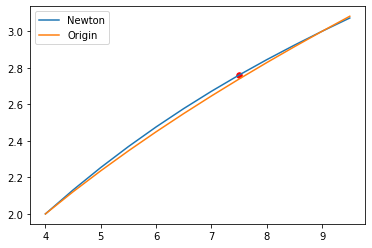

In [7]:
plt.plot(x,y,label='Newton')
plt.plot(x,np.sqrt(x),label='Origin')
plt.scatter(x[7],y[7],s=30.,c='r')
plt.legend(loc='best')
plt.show()

In [8]:
x

array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [9]:
y_old = Append_Newton_inter(x,(np.arange(60)+1)**2,np.arange(60)+1)

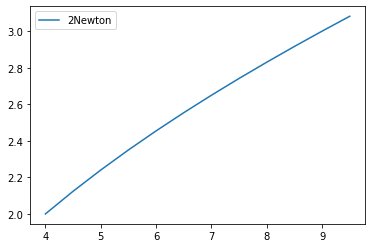

In [10]:
plt.plot(x,y_old,label='2Newton')
#plt.plot(x,np.sqrt(x),label='Origin')
#plt.scatter(x[7],y_old[7],s=30.,c='r')
plt.legend(loc='best')
plt.show()

In [11]:
y_new = Append_Newton_inter(x,(np.arange(80)+1)**2,np.arange(80)+1,y_old,old_num=60)

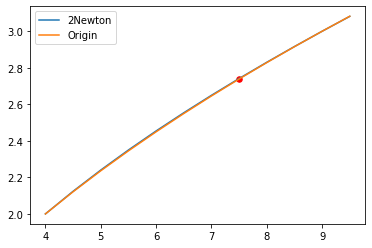

In [12]:
plt.plot(x,y_new,label='2Newton')
plt.plot(x,np.sqrt(x),label='Origin')
plt.scatter(x[7],y_new[7],s=30.,c='r')
plt.legend(loc='best')
plt.show()

In [13]:
y = Append_Newton_inter(x,(np.arange(80)+1)**2,np.arange(80)+1)

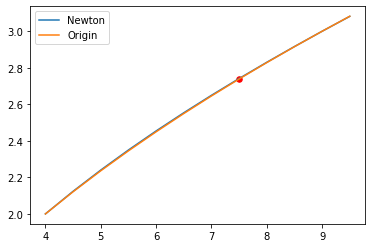

In [14]:
plt.plot(x,y,label='Newton')
plt.plot(x,np.sqrt(x),label='Origin')
plt.scatter(x[7],y[7],s=30.,c='r')
plt.legend(loc='best')
plt.show()

In [15]:
def mini_enough(x, loss, lb, ub,fun):
    N = 2 # 插值点数
    X = np.random.uniform(lb,ub,N)
    Y = fun(X)
    y_real = fun(x)
    y = Append_Newton_inter(x,X,Y)
    LOSS = np.sum((y_real-y)**2)/len(y)
    print(LOSS)
    K = loss
    while LOSS > K:
        N = N + 1
        X = np.append(X,np.random.uniform(lb,ub,1))
        Y = fun(X)
        y = Append_Newton_inter(x,X,Y,y,N-1)
        LOSS =  np.sum((y_real-y)**2)/len(y)
        print(LOSS)
    return {'y':y,'N':N}

In [16]:
def fun(x):
    return np.log(x)
x = np.array([1,2,3,4,5,6])
loss = 0.1
lb = 1
ub = 5

In [17]:
out = mini_enough(x,loss,lb,ub,fun)

0.431784830602363
0.0364405334001314


In [18]:
out['y']

array([0.02590814, 0.67402301, 1.13034699, 1.39488008, 1.46762226,
       1.34857356])

In [19]:
out['N']

3